This notebook opens the MUSE files and plots them "Figures/AllMUSEGalaxies.png".
This notebook also writes the MUSE galaxies and their filenames in ../Data/MUSEdata.csv

In [1]:
import matplotlib.pyplot as plt
from astropy.io import fits
import astropy.io.fits as pyfits
import sys, os
from astropy.wcs import WCS
# !{sys.executable} -m pip install aplpy
import numpy as np
import aplpy
from astropy.table import Table

In [2]:
MUSEtable = Table.read('../Data/0.MUSEdata.csv', format="csv")

no file:  ../../GalaxyFiles/HST/ngc1512_hst_ha.fits
no file:  ../../GalaxyFiles/HST/ngc4303_hst_ha.fits
no file:  ../../GalaxyFiles/HST/ngc4535_hst_ha.fits


/var/folders/db/q76d94y56zscb4zzdy5ffbm80000gn/T/ipykernel_89447/2082146838.py:27: RuntimeWarning: invalid value encountered in log10
  logplot = np.log10(plot)


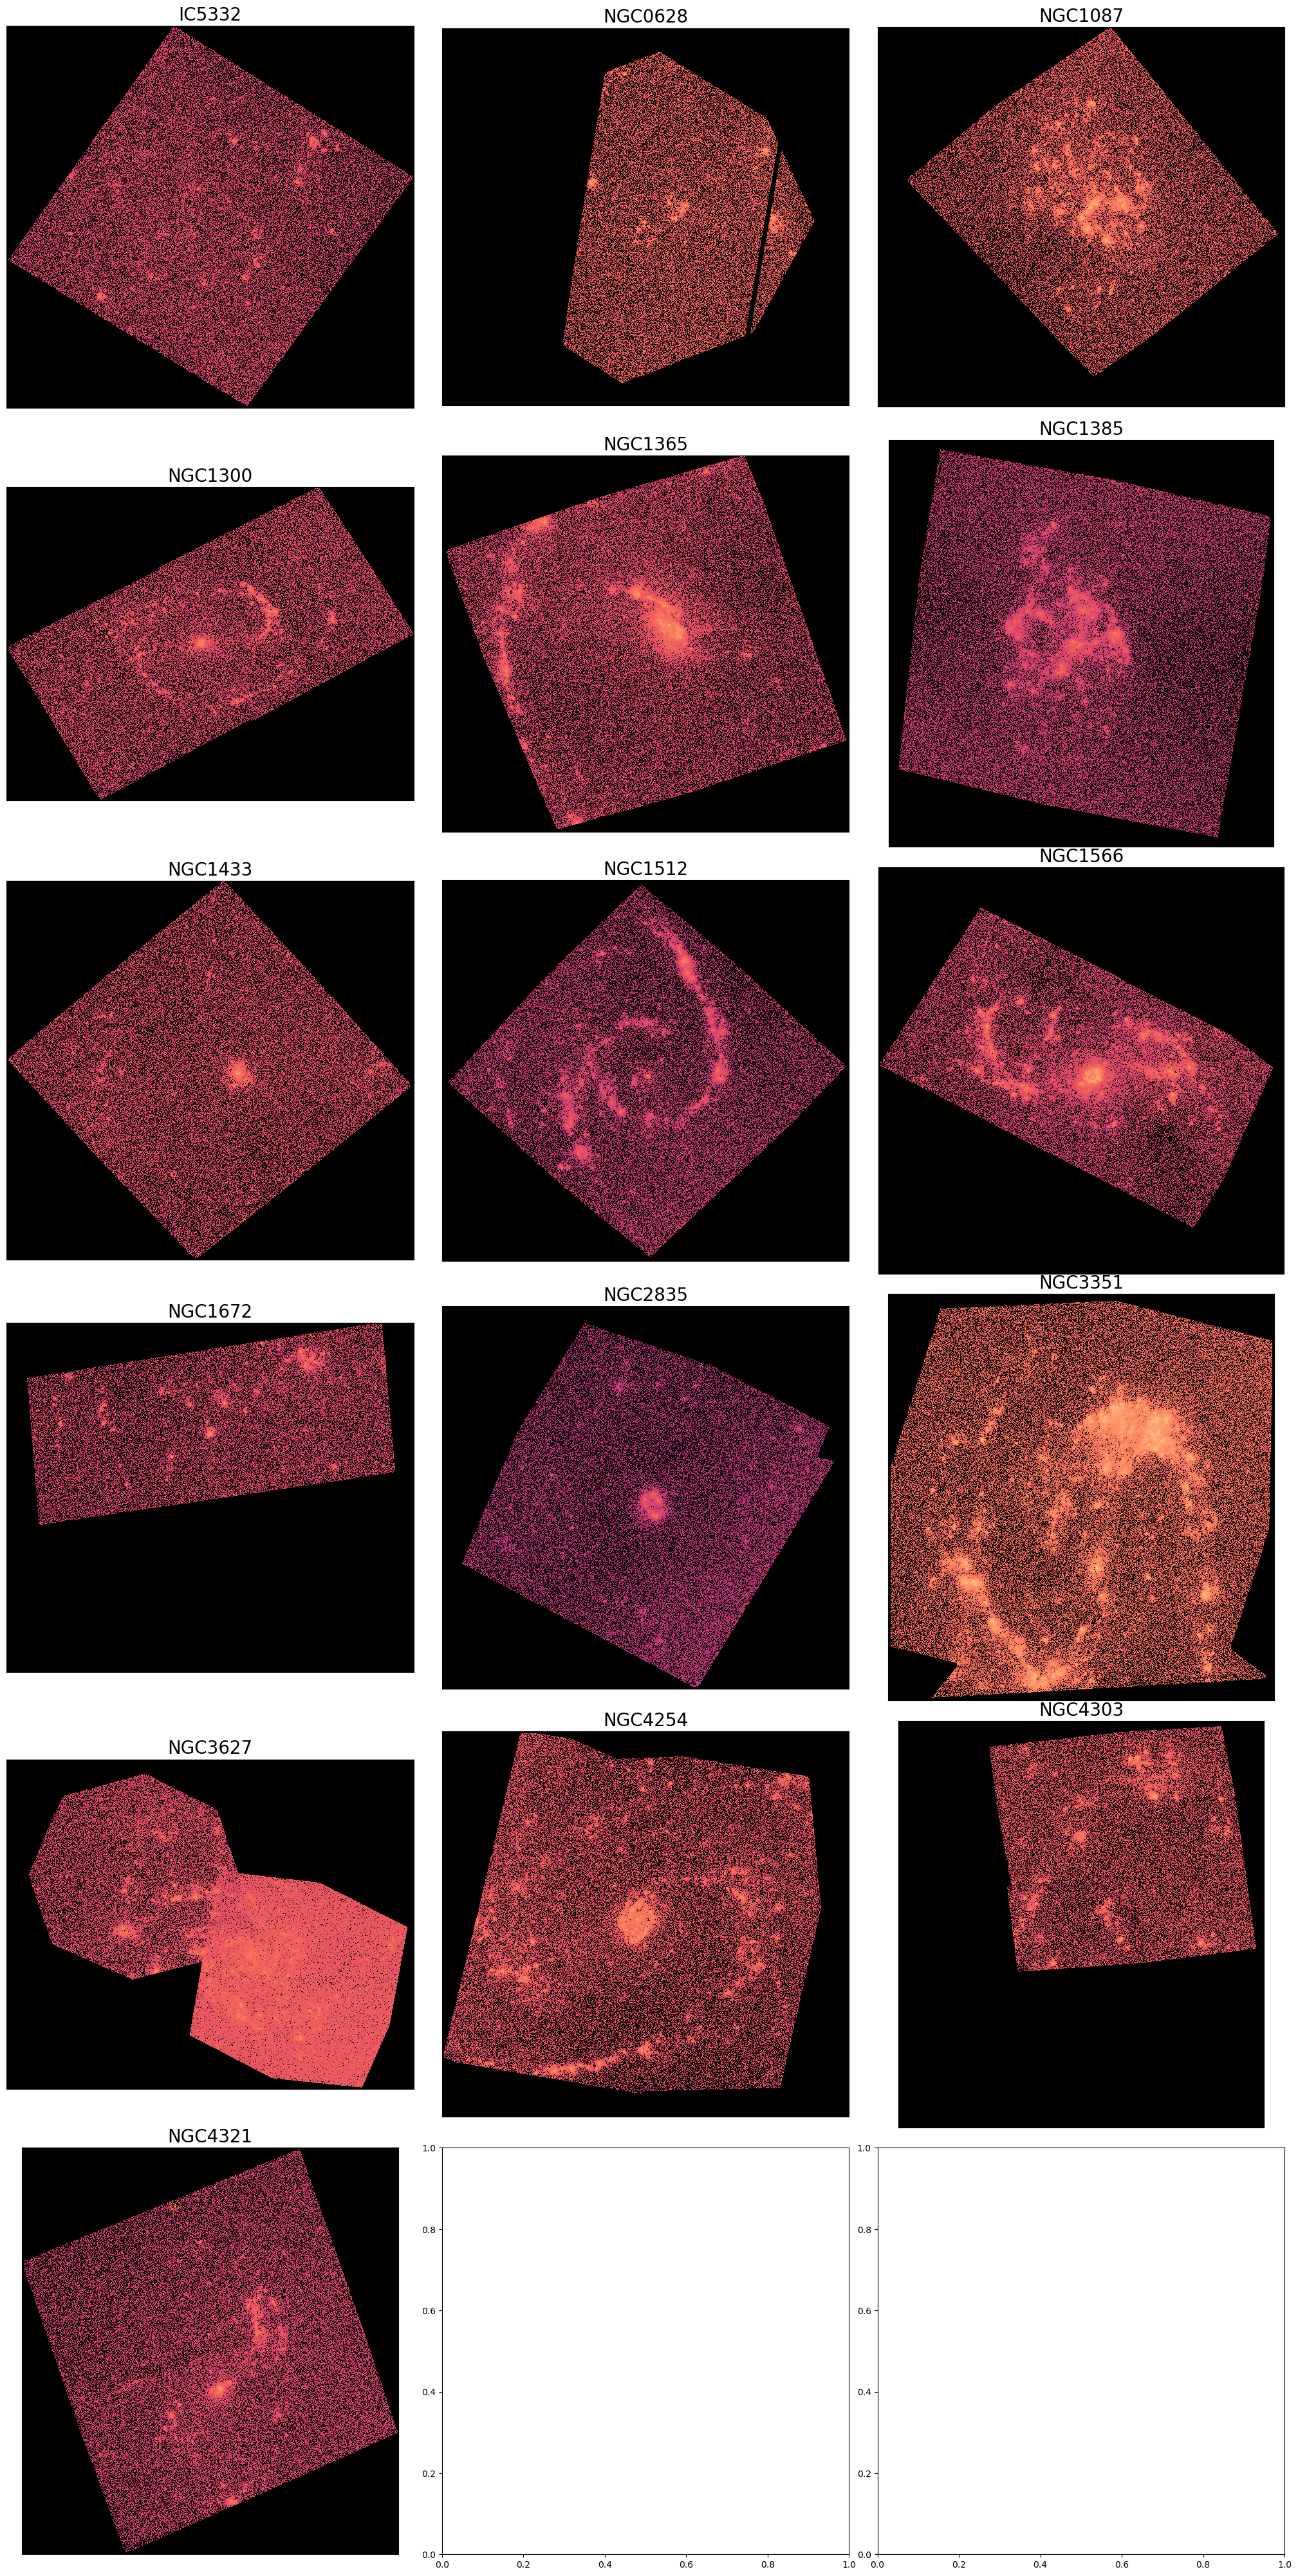

In [3]:
# set up plots & wcs information.
plots, wcss, hdus = [],[],[]
# ext = "HA_FLUX_CORR"
ext = 0

for i in range(len(MUSEtable)):
    fileName = MUSEtable["maps_HST"][i]
    if os.path.isfile(fileName):
        MUSE_hdu = fits.open(fileName)
        hdus.append(MUSE_hdu)
        MUSE_map = MUSE_hdu[ext].data
        plots.append(MUSE_map)
        wcss.append(WCS(MUSE_hdu[ext].header, naxis=2))
#         print(MUSE_hdu[ext].header)
    else:
        print("no file: ", fileName)

current_cmap = plt.get_cmap("magma")
current_cmap.set_bad("black")

# make multipanel plot of MUSE galaxies 
import math
i,j,m=0,0,0
PLOTS_PER_ROW = 3
fig, axs = plt.subplots(math.ceil(len(plots)/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(20, 40))
for plot in plots:
    logplot = np.log10(plot)
    axs[i][j].imshow(logplot, cmap=current_cmap, aspect="equal", origin = "lower", interpolation = "nearest")
    axs[i][j].set_title(MUSEtable["Galaxy"][m].upper(), fontsize=20)
    axs[i][j].set_xticks([])
    axs[i][j].set_yticks([])
    j+=1
    if j%PLOTS_PER_ROW==0:
        i+=1
        j=0
    m+=1
plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=0.1)
plt.show()
fig.savefig("../Figures/AllHSTGalaxies.png", dpi=300)
plt.close()

